Notebook for Q-Q plots and P-P plots used for COVID correlation analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
abp = pd.read_csv("../data/covid_vs_abp.csv")
zba = pd.read_csv("../data/covid_vs_zba.csv")

In [16]:
abp.head()

,covid_issue_year_month,Confirmed cases,Confirmed deaths,project_count,normalized_Confirmed cases,normalized_Confirmed deaths,normalized_project_count
0,2020-02,2,0,3714.0,0.000000,0.000000,0.744155
1,2020-03,6902,72,2952.0,0.014051,0.019481,0.541711
2,2020-04,50483,3189,913.0,0.102800,0.862825,0.000000
3,2020-05,39135,3696,1280.0,0.079691,1.000000,0.097503
4,2020-06,6592,688,2800.0,0.013420,0.186147,0.501328


In [17]:
zba.head()

,covid_issue_year_month,Confirmed cases,Confirmed deaths,approved,denied,Withdrawn,ratio,normalized_Confirmed cases,normalized_Confirmed deaths,normalized_approved,normalized_denied,normalized_Withdrawn,normalized_ratio
0,2020-02,2,0,54.0,11.0,4.0,4.909091,0.000000,0.000000,0.304054,0.357143,0.20,0.069750
1,2020-03,6902,72,42.0,4.0,3.0,10.500000,0.014051,0.019481,0.222973,0.107143,0.15,0.222311
2,2020-04,50483,3189,40.0,6.0,0.0,6.666667,0.102800,0.862825,0.209459,0.178571,0.00,0.117710
3,2020-05,39135,3696,9.0,3.0,2.0,3.000000,0.079691,1.000000,0.000000,0.071429,0.10,0.017657
4,2020-06,6592,688,17.0,2.0,2.0,8.500000,0.013420,0.186147,0.054054,0.035714,0.10,0.167737


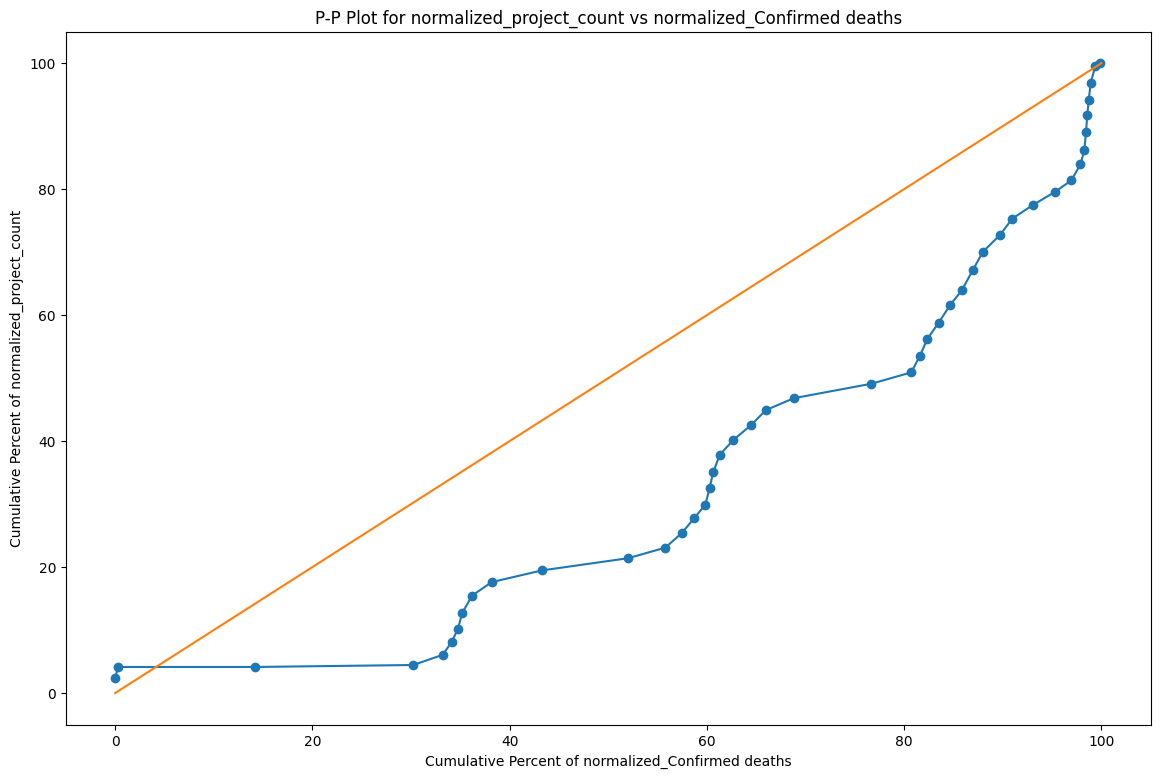

In [18]:
def plot_PP(db, var1, var2):
    sums = {var: db[var].sum() for var in [var1, var2]}
    sum_inc, sum_dev = 0, 0
    ratios_inc, ratios_dev = [], []
    db.sort_values(by="covid_issue_year_month", ascending=True, inplace=True)
    for _, row in db.iterrows():
        sum_inc += row[var1]
        sum_dev += row[var2]
        r_inc = sum_inc
        r_dev = sum_dev
        ratios_inc.append(r_inc * 100 / sums[var1])
        ratios_dev.append(r_dev * 100 / sums[var2])
    fig, ax = plt.subplots(figsize=(14, 9))
    ax.plot(ratios_inc, ratios_dev)
    ax.scatter(ratios_inc, ratios_dev)
    ax.plot(ratios_inc, ratios_inc)
    # ax.scatter(ratios_inc, ratios_inc)
    ax.set_xlabel(f"Cumulative Percent of {var1}")
    ax.set_ylabel(f"Cumulative Percent of {var2}")
    ax.set_title(f"P-P Plot for {var2} vs {var1}")
plot_PP(abp, "normalized_Confirmed deaths", "normalized_project_count")

In [19]:
abp.columns

Index(['covid_issue_year_month', 'Confirmed cases', 'Confirmed deaths',
       'project_count', 'normalized_Confirmed cases',
       'normalized_Confirmed deaths', 'normalized_project_count'],
      dtype='object')

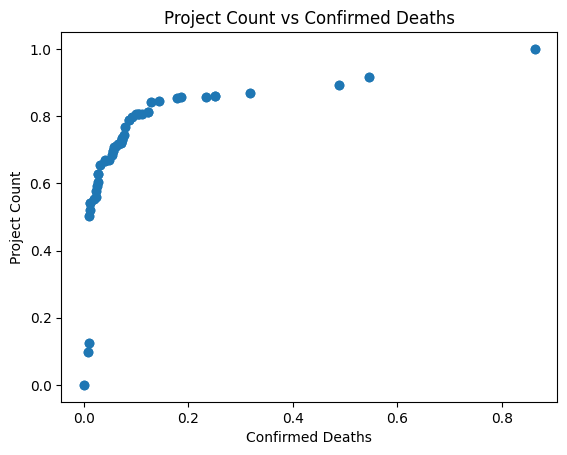

In [20]:
# Functions to compute sample and theoretical quantiles

def sample_quantile(q, sample):
    sorted_sample = np.sort(sample)
    count = 0
    for i in range(len(sorted_sample)):
        count += 1
        if count / len(sample) >= q :
            return sorted_sample[i]
    raise ValueError("unable to find quantile")

def plot_QQ(df, var1, var2, label1, label2):
    fig, ax1 = plt.subplots()
    NUM_QUANT = 100
    quants = [x / NUM_QUANT for x in range(1, NUM_QUANT)]
    sample_quants_1 = [sample_quantile(x, df[var1]) for x in quants]
    sample_quants_2 = [sample_quantile(x, df[var2]) for x in quants]
    ax1.scatter(sample_quants_1, sample_quants_2)
    ax1.set_title(f"{label2} vs {label1}")
    ax1.set_xlabel(label1)
    ax1.set_ylabel(label2)

plot_QQ(abp, "normalized_Confirmed deaths", "normalized_project_count", "Confirmed Deaths", "Project Count")
# .apply(lambda x: (x - cookie_data["Texture Crispiness"].mean()) / cookie_data["Texture Crispiness"].std())) for x in quants]

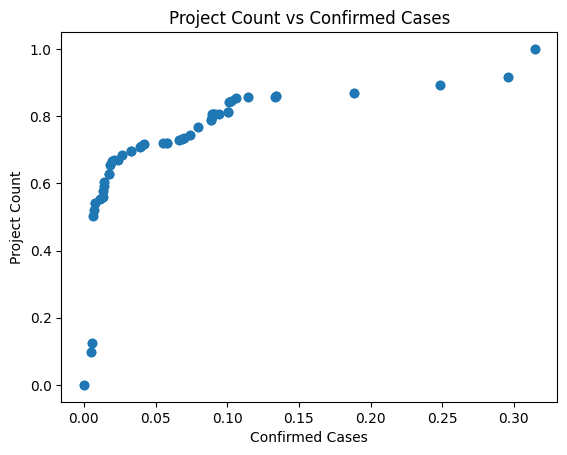

In [21]:
plot_QQ(abp, "normalized_Confirmed cases", "normalized_project_count", "Confirmed Cases", "Project Count")

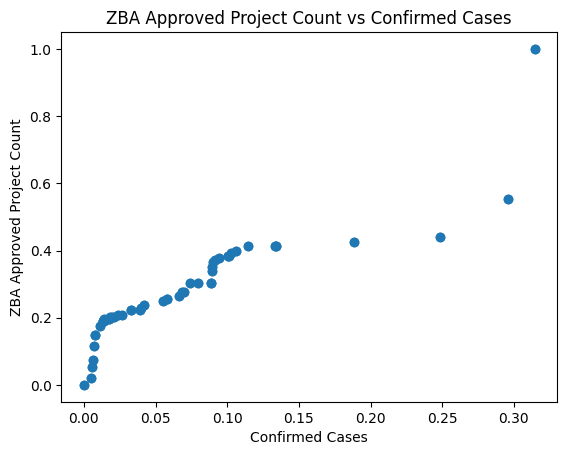

In [22]:
plot_QQ(zba, "normalized_Confirmed cases", "normalized_approved", "Confirmed Cases", "ZBA Approved Project Count")

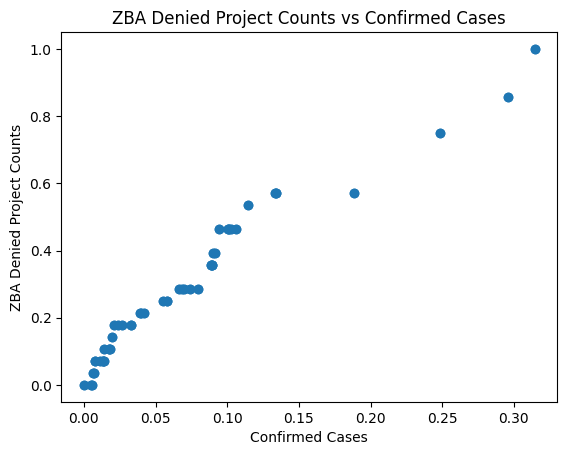

In [23]:
plot_QQ(zba, "normalized_Confirmed cases", "normalized_denied", "Confirmed Cases", "ZBA Denied Project Counts")

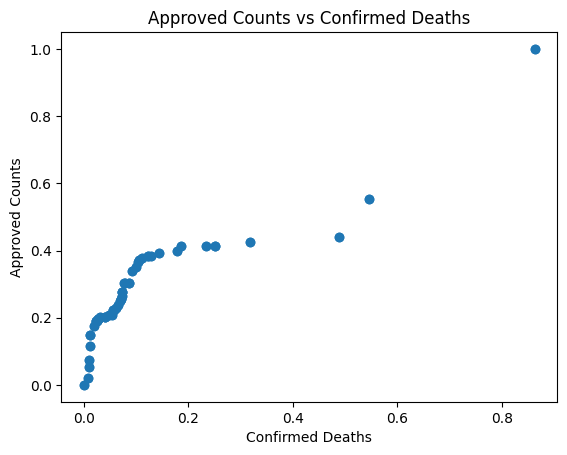

In [24]:
plot_QQ(zba, "normalized_Confirmed deaths", "normalized_approved", "Confirmed Deaths", "Approved Counts")

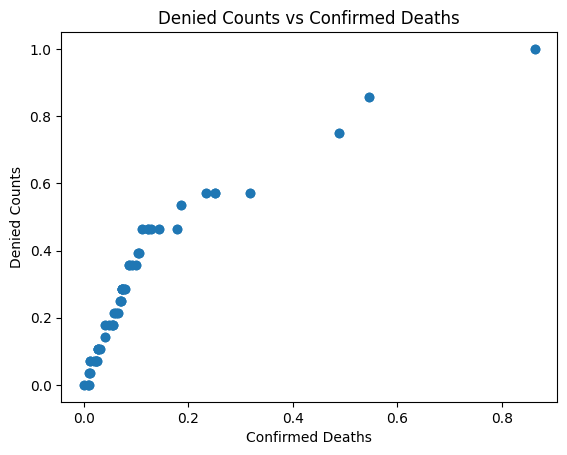

In [26]:
plot_QQ(zba, "normalized_Confirmed deaths", "normalized_denied", "Confirmed Deaths", "Denied Counts")